# Hands-on exercises

## 1. Let's fit two linear models, one for classification and one for regression.

1. Breast cancer wisconsin dataset  (classification). https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer 

`from sklearn.datasets import load_breast_cancer
X_bc, y_bc = load_breast_cancer(return_X_y=True)`


2. California housing dataset (regression) https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

`from sklearn.datasets import fetch_california_housing
X_cal, y_cal = fetch_california_housing(return_X_y=True)`


## Tasks

* Use train_test_split to create two subsets of data, one for fitting the model and the other for testing the model (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) hint:
`from sklearn.model_selection import train_test_split`

* Fit one model for each dataset. test two different values of parameters apart of the parameter by default. Check the score on the test set. hint: `from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression`

* Hint: use ? e.g. `LogisticRegression?`

## 2. Let's fit two models one tree based and one SVC.

Use the wine dataset from scikit-learn. Similar to the previous hands-on exercises, split the data and run using different parameters to obtain the best score on the test set (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

`from sklearn.datasets import load_wine
X_w , y_w = load_wine(return_X_y=True)`


In [3]:
!pip install mglearn

In [4]:
from sklearn.datasets import load_breast_cancer, fetch_california_housing, load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import mglearn

In [5]:
# Breast Cancer Dataset
X_bc, y_bc = load_breast_cancer(return_X_y=True)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, random_state=42)

In [6]:
# Default Logistic Regression
lr_default = LogisticRegression(max_iter=10000)
lr_default.fit(X_train_bc, y_train_bc)
print("Breast Cancer - Logistic Regression (Default):", lr_default.score(X_test_bc, y_test_bc))

# Logistic Regression with different solver
lr_saga = LogisticRegression(solver='saga', max_iter=10000)
lr_saga.fit(X_train_bc, y_train_bc)
print("Breast Cancer - Logistic Regression (Solver=Saga):", lr_saga.score(X_test_bc, y_test_bc))

# Logistic Regression with different regularization strength
lr_c = LogisticRegression(C=0.5, max_iter=10000)
lr_c.fit(X_train_bc, y_train_bc)
print("Breast Cancer - Logistic Regression (C=0.5):", lr_c.score(X_test_bc, y_test_bc))

Breast Cancer - Logistic Regression (Default): 0.965034965034965
Breast Cancer - Logistic Regression (Solver=Saga): 0.965034965034965
Breast Cancer - Logistic Regression (C=0.5): 0.972027972027972


In [7]:
# California Housing Dataset
X_cal, y_cal = fetch_california_housing(return_X_y=True)
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(X_cal, y_cal, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_cal, y_train_cal)
y_pred_cal = lr.predict(X_test_cal)
print("\nCalifornia Housing - Linear Regression MSE:", mean_squared_error(y_test_cal, y_pred_cal))

# Ridge Regression with different alpha values
ridge_1 = Ridge(alpha=0.5)
ridge_1.fit(X_train_cal, y_train_cal)
y_pred_ridge_1 = ridge_1.predict(X_test_cal)
print("California Housing - Ridge Regression (alpha=0.5) MSE:", mean_squared_error(y_test_cal, y_pred_ridge_1))

ridge_2 = Ridge(alpha=1.5)
ridge_2.fit(X_train_cal, y_train_cal)
y_pred_ridge_2 = ridge_2.predict(X_test_cal)
print("California Housing - Ridge Regression (alpha=1.5) MSE:", mean_squared_error(y_test_cal, y_pred_ridge_2))


California Housing - Linear Regression MSE: 0.5411287478470682
California Housing - Ridge Regression (alpha=0.5) MSE: 0.541087720510632
California Housing - Ridge Regression (alpha=1.5) MSE: 0.5410062041242648


In [8]:
# Wine Dataset
X_w, y_w = load_wine(return_X_y=True)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_w, y_train_w)
print("\nWine - Gradient Boosting Classifier Accuracy:", gbc.score(X_test_w, y_test_w))

# LinearSVC
linear_svc = LinearSVC(dual=False, max_iter=10000, random_state=42)
linear_svc.fit(X_train_w, y_train_w)
print("Wine - LinearSVC Accuracy:", linear_svc.score(X_test_w, y_test_w))


Wine - Gradient Boosting Classifier Accuracy: 0.9444444444444444
Wine - LinearSVC Accuracy: 1.0


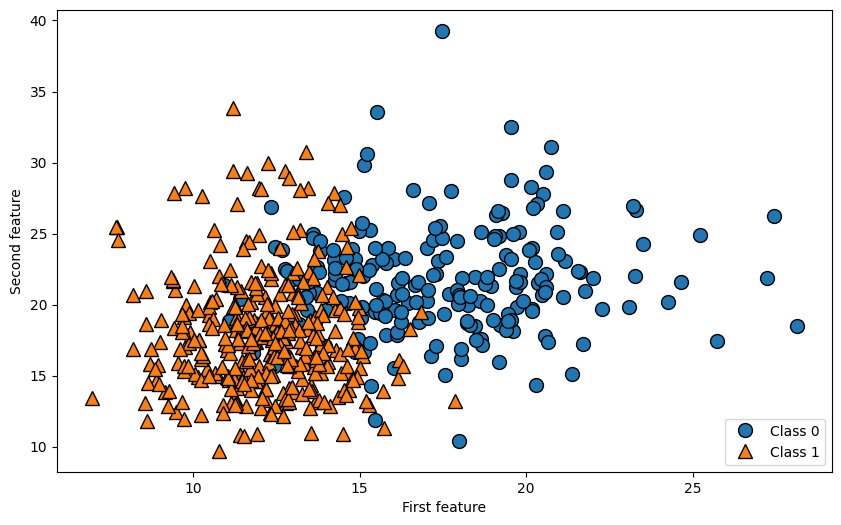

In [9]:
# Visualizing the first few features in the Breast Cancer dataset using mglearn
plt.figure(figsize=(10,6))
mglearn.discrete_scatter(X_bc[:, 0], X_bc[:, 1], y_bc)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()